In [54]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import nltk
import pycountry
from nltk.stem import SnowballStemmer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS
import os
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
from nltk import word_tokenize
from textblob import Word
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
df=pd.read_csv('restaurant.csv')

In [3]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [6]:
df['year']=pd.DatetimeIndex(df['date']).year

In [7]:
df['month']=pd.DatetimeIndex(df['date']).month

In [8]:
df2=pd.DataFrame(df.groupby('year').stars.mean())

<AxesSubplot:xlabel='year', ylabel='stars'>

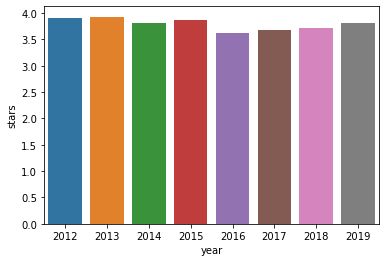

In [9]:
sns.barplot(df2.index,df2.stars)

In [10]:
df.loc[df['stars']==3,'sentiment']='neutral'
df.loc[df['stars']<3,'sentiment']='negative'
df.loc[df['stars']>3,'sentiment']='positive'
df=df[['stars','sentiment','text']]
df

,stars,sentiment,text
0,5,positive,After getting food poisoning at the Palms hote...
1,4,positive,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,positive,The crab legs are better than the ones at Wick...
3,1,negative,Not worth it! Too salty food and expensive! Th...
4,5,positive,I would give this infinite stars if I could. M...
...,...,...,...
10412,5,positive,"Best buffet ever! Irma was great, served us be..."
10413,4,positive,Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414,5,positive,The selection is amazing and all the food is e...
10415,4,positive,One of the best buffets I've had in Vegas. My ...


In [11]:
alphanumeric=lambda x:re.sub('\w*\d\w*',' ',x)
punch_lower=lambda x:re.sub('[%s]'%re.escape(string.punctuation),' ',x.lower())
new_line=lambda x:re.sub('\n',' ',x)

df['text']=df.text.map(alphanumeric).map(punch_lower).map(new_line)
df

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive th...
4,5,positive,i would give this infinite stars if i could m...
...,...,...,...
10412,5,positive,best buffet ever irma was great served us be...
10413,4,positive,hollllllyyyy moleyyyy this buffet was one f...
10414,5,positive,the selection is amazing and all the food is e...
10415,4,positive,one of the best buffets i ve had in vegas my ...


In [12]:
df['language']=df['text'].apply(detect)

In [13]:
df=df[df['language']=='en']

In [14]:
df.sentiment.value_counts()

positive    6852
negative    1964
neutral     1557
Name: sentiment, dtype: int64

In [15]:
df.sentiment.value_counts(normalize=True)

positive    0.660561
negative    0.189338
neutral     0.150101
Name: sentiment, dtype: float64

In [16]:
df[['polarity','subjectivity']]=df['text'].apply(lambda Text:pd.Series(TextBlob(Text).sentiment))
df

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702
1,4,positive,a feast worthy of gods baccarnal buffet in ...,en,0.217299,0.532126
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive th...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could m...,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us be...,en,0.543750,0.481250
10413,4,positive,hollllllyyyy moleyyyy this buffet was one f...,en,0.210101,0.586869
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000
10415,4,positive,one of the best buffets i ve had in vegas my ...,en,0.185185,0.533333


In [17]:
def create_wordcloud(text):
    mask=np.array(Image.open('cloud.png'))
    stopwords=set(STOPWORDS)
    wc=WordCloud(background_color='white',
                mask=mask,
                max_words=25000,
                stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    path='wc.png'
    display(Image.open(path))

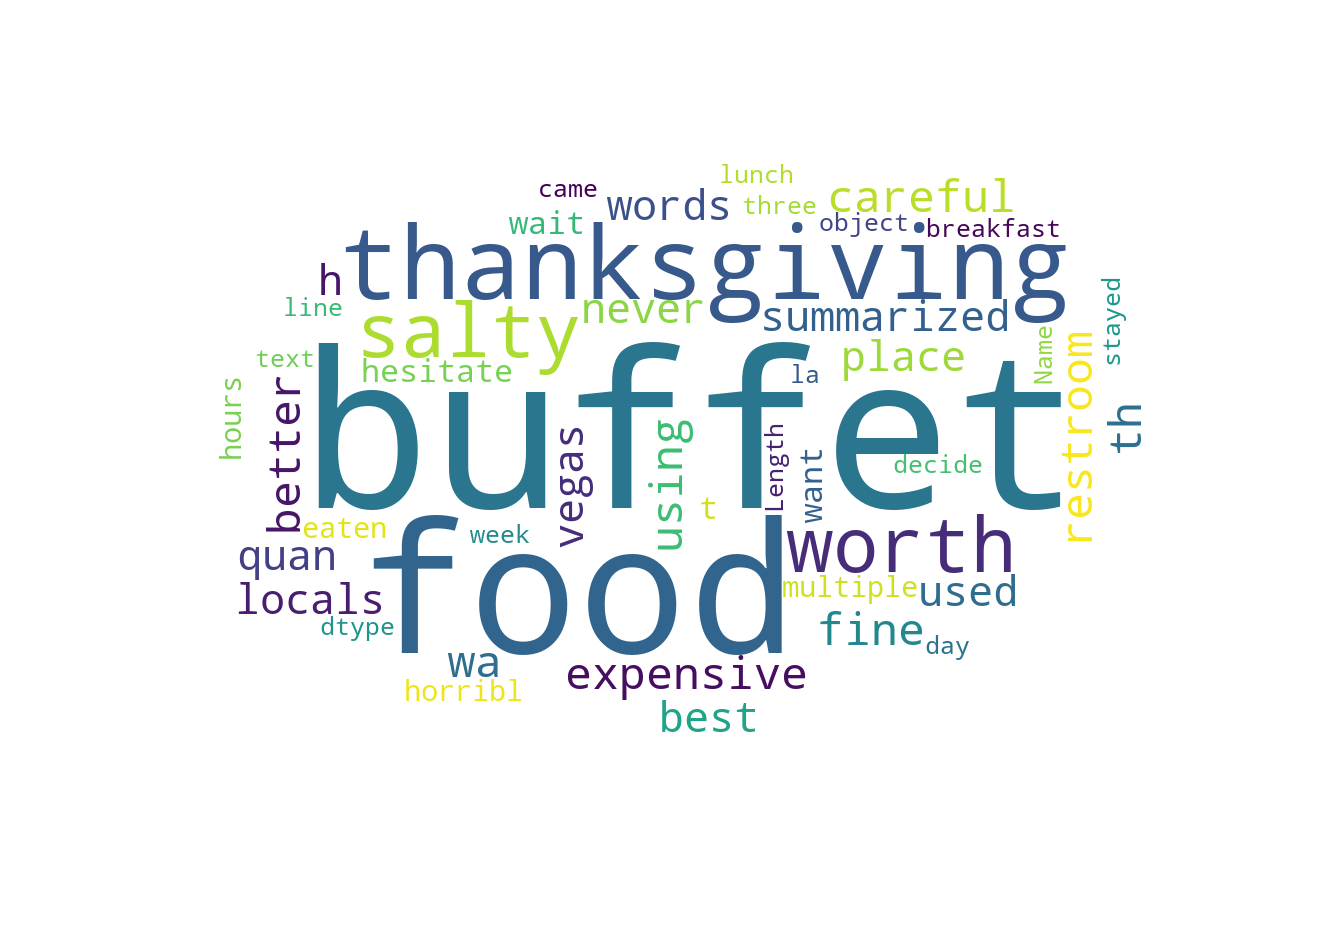

In [18]:
text1=df[df['stars']==1]
create_wordcloud(text1.text)

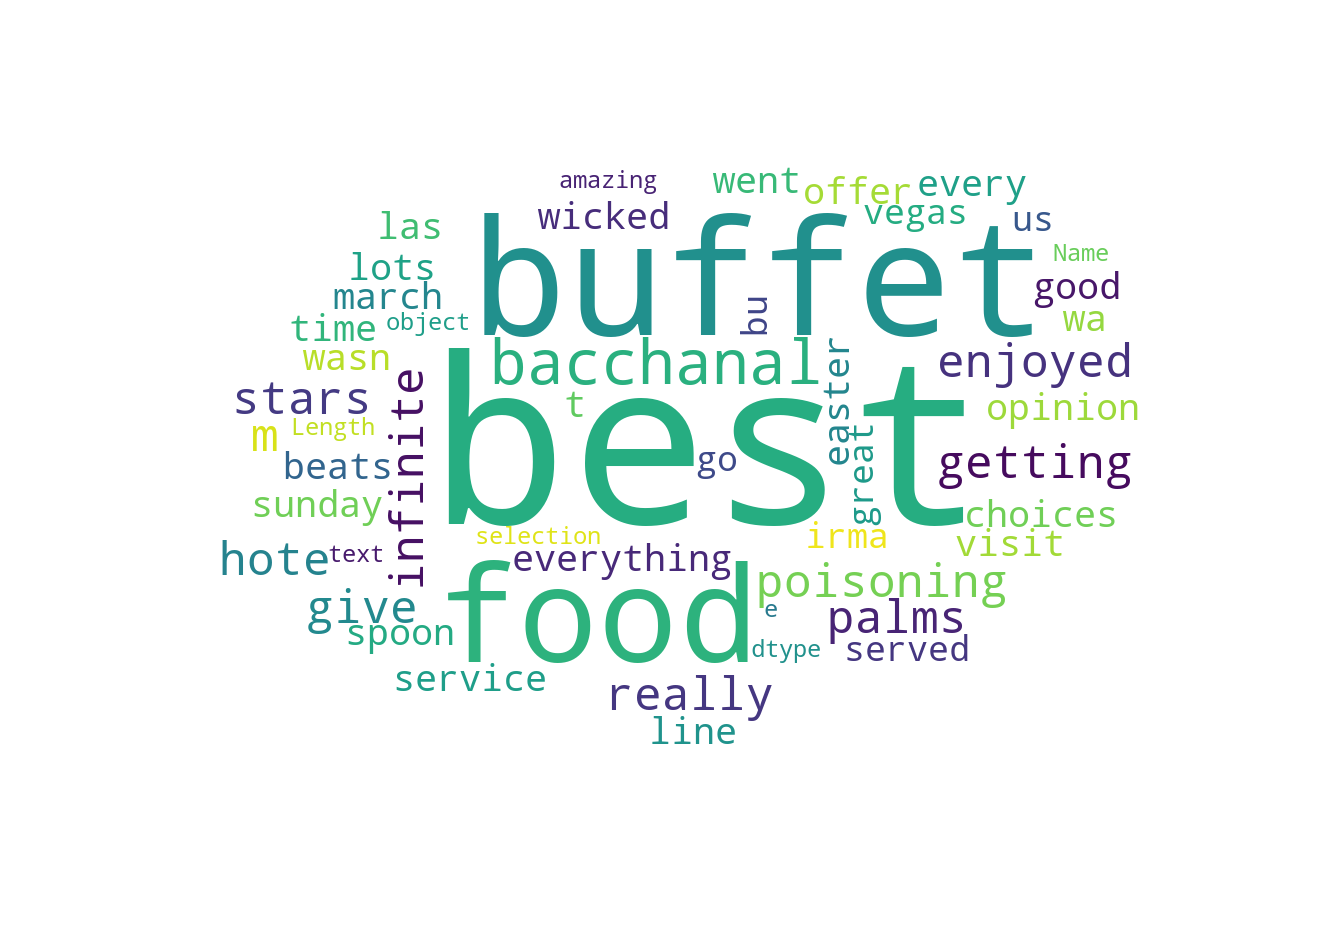

In [19]:
text5=df[df['stars']==5]
create_wordcloud(text5.text)

In [20]:
df=df.dropna()
df

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702
1,4,positive,a feast worthy of gods baccarnal buffet in ...,en,0.217299,0.532126
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive th...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could m...,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us be...,en,0.543750,0.481250
10413,4,positive,hollllllyyyy moleyyyy this buffet was one f...,en,0.210101,0.586869
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000
10415,4,positive,one of the best buffets i ve had in vegas my ...,en,0.185185,0.533333


In [21]:
x=df.text
y=df.sentiment

In [22]:
df_algoritma=df[['text','sentiment']]

In [23]:
df_algoritma['removal_char']=df_algoritma['text'].str.replace('[^a-zA-Z0-9\s]','')
df_algoritma

,text,sentiment,removal_char
0,after getting food poisoning at the palms hote...,positive,after getting food poisoning at the palms hote...
1,a feast worthy of gods baccarnal buffet in ...,positive,a feast worthy of gods baccarnal buffet in ...
2,the crab legs are better than the ones at wick...,positive,the crab legs are better than the ones at wick...
3,not worth it too salty food and expensive th...,negative,not worth it too salty food and expensive th...
4,i would give this infinite stars if i could m...,positive,i would give this infinite stars if i could m...
...,...,...,...
10412,best buffet ever irma was great served us be...,positive,best buffet ever irma was great served us be...
10413,hollllllyyyy moleyyyy this buffet was one f...,positive,hollllllyyyy moleyyyy this buffet was one f...
10414,the selection is amazing and all the food is e...,positive,the selection is amazing and all the food is e...
10415,one of the best buffets i ve had in vegas my ...,positive,one of the best buffets i ve had in vegas my ...


In [24]:
df_algoritma['removal_char']=df_algoritma['removal_char'].apply(lambda x:word_tokenize(x.lower()))
df_algoritma.head()

,text,sentiment,removal_char
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal..."
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet..."
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones..."
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens..."
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,..."


In [26]:
stop_words=list(stopwords.words('english'))
df_algoritma['stopword_removal']=df_algoritma['removal_char'].apply(lambda x:[word for word in x if word not in stop_words])
df_algoritma.head()

,text,sentiment,removal_char,stopword_removal
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal...","[getting, food, poisoning, palms, hotel, scare..."
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet...","[feast, worthy, gods, baccarnal, buffet, caesa..."
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones...","[crab, legs, better, ones, wicked, spoon, huge..."
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens...","[worth, salty, food, expensive, furst, kast, v..."
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,...","[would, give, infinite, stars, could, family, ..."


In [27]:
df_algoritma['stopword_removal']=df_algoritma['stopword_removal'].apply(lambda x:' '.join(x))
df_algoritma.head()

,text,sentiment,removal_char,stopword_removal
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal...",getting food poisoning palms hotel scared eat ...
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet...",feast worthy gods baccarnal buffet caesar pala...
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones...",crab legs better ones wicked spoon huge prawns...
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens...",worth salty food expensive furst kast visit bu...
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,...",would give infinite stars could family diamond...


In [31]:
df_algoritma['stopword_removal']=df_algoritma['stopword_removal'].apply(lambda x:WordNetLemmatizer().lemmatize(x))
df_algoritma['sentiment_polarity']=df_algoritma['stopword_removal'].apply(lambda x:TextBlob(x).sentiment.polarity)
df_algoritma['sentiment_subjectivity']=df_algoritma['stopword_removal'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
df_algoritma.head()

,text,sentiment,removal_char,stopword_removal,sentiment_polarity,sentiment_subjectivity
0,after getting food poisoning at the palms hote...,positive,"[after, getting, food, poisoning, at, the, pal...",getting food poisoning palms hotel scared eat ...,0.348197,0.611273
1,a feast worthy of gods baccarnal buffet in ...,positive,"[a, feast, worthy, of, gods, baccarnal, buffet...",feast worthy gods baccarnal buffet caesar pala...,0.220060,0.532956
2,the crab legs are better than the ones at wick...,positive,"[the, crab, legs, are, better, than, the, ones...",crab legs better ones wicked spoon huge prawns...,-0.134722,0.731944
3,not worth it too salty food and expensive th...,negative,"[not, worth, it, too, salty, food, and, expens...",worth salty food expensive furst kast visit bu...,-0.100000,0.400000
4,i would give this infinite stars if i could m...,positive,"[i, would, give, this, infinite, stars, if, i,...",would give infinite stars could family diamond...,0.362500,0.725000


In [34]:
#vect=TfidfVectorizer()
vect=CountVectorizer()
x=vect.fit_transform(df_algoritma['stopword_removal'])

In [35]:
def df_sentence(score):
    if score>0.2:
        return 2
    elif score<-0.2:
        return 0
    else:
        return 1
df_algoritma['class']=df_algoritma['sentiment_polarity'].apply(lambda x:df_sentence(x))

In [36]:
df_algoritma=df_algoritma[['class','stopword_removal']]

In [37]:
y=df_algoritma['class']
x=df_algoritma['stopword_removal']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [49]:
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 14185)	1
  (0, 370)	1
  (0, 3705)	1
  (0, 10737)	1
  (0, 7591)	1
  (0, 15318)	1
  (0, 3966)	1
  (0, 10151)	1
  (0, 10188)	1
  (0, 8766)	1
  (0, 4029)	1
  (0, 4865)	1
  (0, 14313)	1
  (0, 11658)	1
  (0, 10727)	1
  (0, 1808)	1
  (0, 6821)	1
  (0, 11941)	1
  (0, 3712)	1
  (0, 5754)	1
  (0, 6091)	1
  (0, 4690)	1
  (0, 6221)	1
  (0, 5372)	2
  (0, 7059)	1
  :	:
  (7778, 15490)	1
  (7778, 1931)	1
  (7778, 10609)	1
  (7778, 4304)	2
  (7778, 8893)	1
  (7778, 15179)	1
  (7778, 10020)	1
  (7778, 5987)	1
  (7778, 14474)	1
  (7778, 5353)	1
  (7778, 15386)	1
  (7778, 10513)	1
  (7778, 10388)	1
  (7778, 14563)	1
  (7778, 5430)	1
  (7778, 6421)	1
  (7778, 8493)	1
  (7778, 15188)	1
  (7778, 7603)	1
  (7778, 5155)	1
  (7778, 6722)	1
  (7778, 11095)	1
  (7778, 10052)	1
  (7778, 12540)	1
  (7778, 12069)	1


In [50]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

,aa,aaaah,aaaawesome,aaahhh,aaammmaaazzingggg,aahs,aalty,aamazing,aawwsm,aback,...,ziplock,zipped,ziti,zitis,zone,zones,zoo,zoomed,zorro,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
vect=CountVectorizer(lowercase=False)
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

(7779, 15781)

In [52]:
vect=CountVectorizer(ngram_range=(1,2))
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape

(7779, 279790)

In [55]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)

nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)

print(metrics.accuracy_score(y_test,y_pred_class))

NameError: name 'metrics' is not defined